<a href="https://colab.research.google.com/github/BitnooriLee/Applied-Machine-Learning/blob/main/assignment_2_DAT340.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programming assignment 2: Random forests**

Bitnoori Lee

Sena Bayraktaroglu

In [ ]:
# Import Data set
from google.colab import drive
drive.mount('/content/gdrive')

root = '/content/gdrive/My Drive/DAT340/'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#from sklearn.model_selection import train_test_split

testdata = pd.read_csv(root+"adult_test.csv")
traindata = pd.read_csv(root+"adult_train.csv")

Mounted at /content/gdrive


In [ ]:
traindata

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,27,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
1,27,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,25,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,46,Private,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
4,45,Private,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,43,Local-gov,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,44,Private,10th,6,Never-married,Farming-fishing,Unmarried,White,Male,0,0,35,United-States,<=50K
32558,23,Private,Some-college,10,Separated,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
32559,45,Local-gov,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,45,United-States,>50K


In [ ]:
X_train = traindata.loc[:,traindata.columns !="target"]
Y_train = traindata["target"]

X_test = testdata.loc[:,testdata.columns !="target"]
Y_test = testdata["target"]

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dicts_for_my_training_data = X_train.to_dict('records')
dv = DictVectorizer()
X_train_encoded = dv.fit_transform(dicts_for_my_training_data)

dicts_for_my_test_data = X_test.to_dict('records')
X_test_encoded = dv.transform(dicts_for_my_test_data)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

GBC = GradientBoostingClassifier()
result =cross_val_score(GBC, X_train_encoded, Y_train)
print("cross validation GradientBoostingClassifier ",result)


cross validation GradientBoostingClassifier  [0.86427146 0.87208231 0.86624693 0.86210074 0.8634828 ]


In [ ]:
from sklearn.metrics import accuracy_score
GBC.fit(X_train_encoded, Y_train)
Yguess = GBC.predict(X_test_encoded)
print(accuracy_score(Y_test, Yguess))

0.8711381364781033


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
pipeline = make_pipeline(
  DictVectorizer(),
  GradientBoostingClassifier()
)
pipeline.fit(dicts_for_my_training_data,Y_train)
Yguess = pipeline.predict(dicts_for_my_test_data)
print(accuracy_score(Y_test, Yguess))

0.8711381364781033


TASK 2

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
acc_train_dtc = []
acc_test_dtc = []
for i in range(1,20): 
  pipeline = make_pipeline(
    DictVectorizer(),
    DecisionTreeClassifier(max_depth = i)
  )
  pipeline.fit(dicts_for_my_training_data,Y_train)
  print("max depth : ",i)
  acc_temp_train = accuracy_score(Y_train, pipeline.predict(dicts_for_my_training_data))
  acc_train_dtc.append(acc_temp_train)
  print("train accuracy : ",acc_temp_train)
  acc_temp_test = accuracy_score(Y_test, pipeline.predict(dicts_for_my_test_data))
  acc_test_dtc.append(acc_temp_test)
  print("test accuracy : ",acc_temp_test)
  #print(f1_score(Y_test, Yguess))

max depth :  1
train accuracy :  0.7591904425539756
test accuracy :  0.7637737239727289
max depth :  2
train accuracy :  0.8282300912134148
test accuracy :  0.8306615072784227
max depth :  3
train accuracy :  0.8438930008292128
test accuracy :  0.8447884036607088
max depth :  4
train accuracy :  0.8438930008292128
test accuracy :  0.8447884036607088
max depth :  5
train accuracy :  0.8519701483369675
test accuracy :  0.8522818008721823
max depth :  6
train accuracy :  0.8570989834464543
test accuracy :  0.8575640316933849
max depth :  7
train accuracy :  0.8583888701206965
test accuracy :  0.8568269762299613
max depth :  8
train accuracy :  0.8605386812444336
test accuracy :  0.8567655549413427
max depth :  9
train accuracy :  0.8639476674549308
test accuracy :  0.8586696148885203
max depth :  10
train accuracy :  0.8693529068517551
test accuracy :  0.8610036238560285
max depth :  11
train accuracy :  0.873806087036639
test accuracy :  0.8602051471039862
max depth :  12
train accuracy 

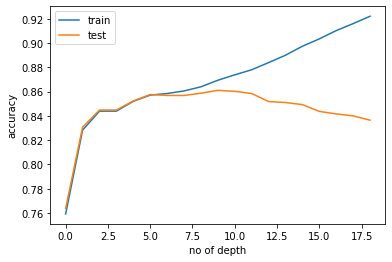

In [ ]:
plt.plot(acc_train_dtc,label="train")
plt.plot(acc_test_dtc,label="test")
plt.xlabel("no of depth")
plt.ylabel("accuracy")
plt.legend(loc="upper left")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
acc_train_rfc = []
acc_test_rfc = []
for i in range(1,20): 
  pipeline = make_pipeline(
    DictVectorizer(),
    RandomForestClassifier(max_depth= i,n_jobs=-1)
  )
  pipeline.fit(dicts_for_my_training_data,Y_train)
  print("max depth : ",i)
  acc_temp_train = accuracy_score(Y_train, pipeline.predict(dicts_for_my_training_data))
  acc_train_rfc.append(acc_temp_train)
  print("train accuracy : ",acc_temp_train)
  acc_temp_test = accuracy_score(Y_test, pipeline.predict(dicts_for_my_test_data))
  acc_test_rfc.append(acc_temp_test)
  print("test accuracy : ",acc_temp_test)

max depth :  1
train accuracy :  0.7591904425539756
test accuracy :  0.7637737239727289
max depth :  2
train accuracy :  0.7643807008384264
test accuracy :  0.7680117928874147
max depth :  3
train accuracy :  0.7895949141611129
test accuracy :  0.7925803083348688
max depth :  4
train accuracy :  0.8268173581892448
test accuracy :  0.8256863829003133
max depth :  5
train accuracy :  0.8413746506556924
test accuracy :  0.8408574411891161
max depth :  6
train accuracy :  0.84730198703971
test accuracy :  0.8460168294330815
max depth :  7
train accuracy :  0.8500353183256043
test accuracy :  0.8497021067501996
max depth :  8
train accuracy :  0.8563926169343693
test accuracy :  0.8551686014372581
max depth :  9
train accuracy :  0.8600780074322042
test accuracy :  0.855352865303114
max depth :  10
train accuracy :  0.8642854949172323
test accuracy :  0.8586696148885203
max depth :  11
train accuracy :  0.8678173274776573
test accuracy :  0.8598366193722744
max depth :  12
train accuracy : 

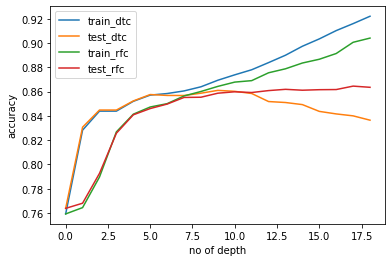

In [ ]:
plt.plot(acc_train_dtc,label="train_dtc")
plt.plot(acc_test_dtc,label="test_dtc")
plt.plot(acc_train_rfc,label="train_rfc")
plt.plot(acc_test_rfc,label="test_rfc")
plt.xlabel("no of depth")
plt.ylabel("accuracy")
plt.legend(loc="upper left")

In [ ]:
for i in range(1,10,500): 
  print(i)


1


1
31
61
91
121


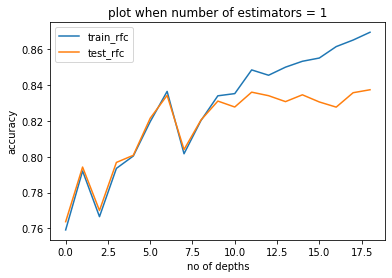

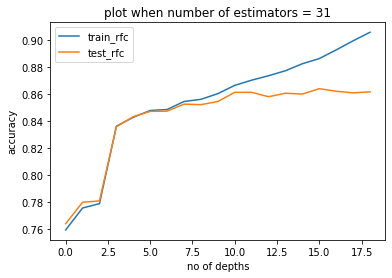

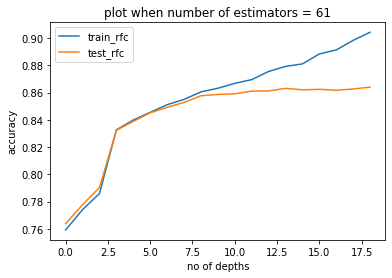

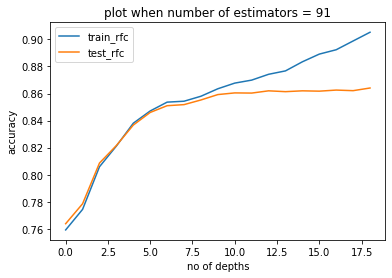

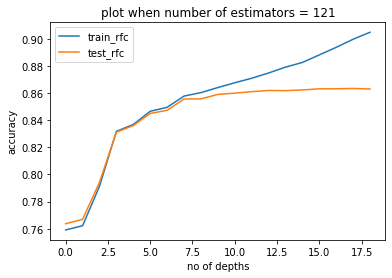

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from datetime import datetime

time_array = []

for i in range(1,150,30): 
  acc_train_rfc = []
  acc_test_rfc = []
  print(i)
  for j in range(1,20):
    pipeline = make_pipeline(
      DictVectorizer(),
      RandomForestClassifier(max_depth= j,n_estimators= i,n_jobs=-1)
    )
    start = datetime.now()
    pipeline.fit(dicts_for_my_training_data,Y_train)
    end = datetime.now()
    time_array.append(end-start)
    #print(end-start)
    acc_temp_train = accuracy_score(Y_train, pipeline.predict(dicts_for_my_training_data))
    acc_temp_test = accuracy_score(Y_test, pipeline.predict(dicts_for_my_test_data))
    acc_test_rfc.append(acc_temp_test)
    #print("test accuracy : ",acc_temp_test)
    acc_train_rfc.append(acc_temp_train)
    #print("train accuracy : ",acc_temp_train)
    x = np.arange(1,500,10)
  plt.figure()  
  plt.plot(acc_train_rfc ,label="train_rfc")
  plt.plot(acc_test_rfc, label="test_rfc")
  title_name = "plot when number of estimators = " + str(i)
  plt.title(title_name)
  plt.xlabel("no of depths")
  plt.ylabel("accuracy")
  plt.legend(loc="upper left")


**QUESTIONS** 

*   Accuracy for test set in decision tree starts to decrease after the number of depths while accuracy for random forest converges at a value even though the number of depths increases. This difference occurs because the decision tree has more possibility of overfitting due to variance. However since a random forest uses multiple trees, it has a lower chance to overfit.  
*   Curve has a jumping behaviour when number of estimators equal to 1 however this jumping behaviour decreases as number of estimators increase.   
*   Best accuracy converges at a value as ensemble size grows
*   As we increase ensemble size, training time also increases. When ensemble 1 execution time was 00.678524, when ensemble size was 500 execution time was  0:00:16.929996


TASK 3

In [ ]:
pipeline = make_pipeline(
  DictVectorizer(),
  RandomForestClassifier(max_depth= 11,n_estimators= 100,n_jobs=-1)
)
start = datetime.now()
pipeline.fit(dicts_for_my_training_data,Y_train)
importances = pipeline[1].feature_importances_

In [ ]:
importances_sorted = np.sort(importances)[::-1]
importances_indexes = np.argsort(importances)[::-1]
print(importances_sorted)
print(importances_indexes)

[1.63255953e-01 1.21978483e-01 1.01668896e-01 9.89031563e-02
 6.99746809e-02 5.67365028e-02 3.72674117e-02 3.65450648e-02
 2.72309801e-02 2.51099585e-02 2.50725068e-02 2.48193719e-02
 2.08543884e-02 1.82653832e-02 1.78743134e-02 1.56832927e-02
 1.41788100e-02 1.29363682e-02 1.08387692e-02 9.41028459e-03
 8.50091960e-03 8.23311686e-03 5.18613695e-03 4.62164824e-03
 3.35873333e-03 3.12741289e-03 3.07113537e-03 2.73921202e-03
 2.64933887e-03 2.31292329e-03 2.21364302e-03 2.21139426e-03
 2.18290051e-03 1.99779554e-03 1.94767980e-03 1.94162733e-03
 1.83748392e-03 1.76275852e-03 1.68952905e-03 1.64548640e-03
 1.60937410e-03 1.54858411e-03 1.54756504e-03 1.53883235e-03
 1.51900385e-03 1.51877944e-03 1.51508329e-03 1.24407393e-03
 1.18937912e-03 1.09551518e-03 1.05790463e-03 1.02650096e-03
 9.98472388e-04 8.03045240e-04 7.97826935e-04 6.02059972e-04
 5.80589189e-04 5.32398290e-04 4.95343031e-04 4.61614747e-04
 4.10605844e-04 4.00603228e-04 3.93172478e-04 3.74155845e-04
 3.48479176e-04 3.325312

In [ ]:
names = pipeline[0].get_feature_names_out([importances])
print(names)

['age' 'capital-gain' 'capital-loss' 'education-num' 'education=10th'
 'education=11th' 'education=12th' 'education=1st-4th' 'education=5th-6th'
 'education=7th-8th' 'education=9th' 'education=Assoc-acdm'
 'education=Assoc-voc' 'education=Bachelors' 'education=Doctorate'
 'education=HS-grad' 'education=Masters' 'education=Preschool'
 'education=Prof-school' 'education=Some-college' 'hours-per-week'
 'marital-status=Divorced' 'marital-status=Married-AF-spouse'
 'marital-status=Married-civ-spouse'
 'marital-status=Married-spouse-absent' 'marital-status=Never-married'
 'marital-status=Separated' 'marital-status=Widowed' 'native-country=?'
 'native-country=Cambodia' 'native-country=Canada' 'native-country=China'
 'native-country=Columbia' 'native-country=Cuba'
 'native-country=Dominican-Republic' 'native-country=Ecuador'
 'native-country=El-Salvador' 'native-country=England'
 'native-country=France' 'native-country=Germany' 'native-country=Greece'
 'native-country=Guatemala' 'native-countr

In [ ]:
names_sorted = names[importances_indexes]
print(names_sorted)

['capital-gain' 'marital-status=Married-civ-spouse' 'education-num'
 'relationship=Husband' 'age' 'marital-status=Never-married'
 'hours-per-week' 'capital-loss' 'occupation=Exec-managerial'
 'occupation=Prof-specialty' 'relationship=Not-in-family'
 'education=Bachelors' 'relationship=Own-child' 'relationship=Wife'
 'sex=Female' 'sex=Male' 'education=Masters' 'marital-status=Divorced'
 'education=Prof-school' 'education=HS-grad' 'relationship=Unmarried'
 'occupation=Other-service' 'education=Doctorate' 'workclass=Self-emp-inc'
 'workclass=Self-emp-not-inc' 'education=7th-8th' 'education=Some-college'
 'workclass=Private' 'occupation=Farming-fishing' 'workclass=Federal-gov'
 'race=Black' 'education=11th' 'marital-status=Separated'
 'occupation=Tech-support' 'race=White' 'occupation=Adm-clerical'
 'native-country=United-States' 'occupation=Handlers-cleaners'
 'occupation=Craft-repair' 'marital-status=Widowed'
 'native-country=Mexico' 'occupation=Sales' 'occupation=?'
 'education=10th' 'e

ALTERNATIVE SOLUTION

In [ ]:
importances = pipeline.steps[1][1].feature_importances_
importances_names = pipeline.steps[0][1].feature_names_
ranked = sorted(zip(importances, importances_names), reverse=True)[:20]

for imp, name in ranked:
    print(name, imp)

capital-gain 0.14713457915933575
marital-status=Married-civ-spouse 0.11343764701398681
age 0.10019585822461582
education-num 0.09774007423960154
relationship=Husband 0.07084599091777989
hours-per-week 0.06792528339767225
capital-loss 0.04249730486033591
marital-status=Never-married 0.032705719368690454
occupation=Exec-managerial 0.024109133720143304
occupation=Prof-specialty 0.019114609949168568
relationship=Not-in-family 0.017171431687904085
education=Bachelors 0.016314131876308723
relationship=Own-child 0.014781198912392681
education=Masters 0.013782513967263441
sex=Female 0.013625540831826266
relationship=Wife 0.013594831996176495
sex=Male 0.011141017451011691
marital-status=Divorced 0.009550833636797306
occupation=Other-service 0.009505398592626203
education=HS-grad 0.00881567116038279


We found 3 most important individual features as "capital gain" , "marital-status=Married-civ-spouse", "education-num". The main reason why capital gain shows the highest score among the features is that the profit from selling capital has a larger effect on the model. Because normally, the scale of profit from investment is way more than a regular salary. Marital-status=Married-civ-spouse has the second largest effect on the model, even though it's unclear us to the reason for that. For the education-num, because generally, professionals who got higher education can get more chance to earn more salary. That is why we can understand that this feature affects the model. 

**COMMENT** Another method that can be used to compute feature importances are permutation importance. Python's random forest importance of feature calculating is biased because it relies on the model's internal parameters. One of the drawbacks of the method is that when for example two features are correlated, it selects one of the features and neglects the importance of the second one. It might bring wrong conclusions. The other method is permutation importance better because it doesn't rely on the internal model parameters instead, it measures variable importance by looking at its effect on the model by randomly selecting variables.   